## Naive Bayers

# **Naive Bayes Overview**

Naive Bayes (NB) classifiers are a family of probabilistic models based on Bayes' theorem, with the key assumption that features are conditionally independent given the class. Despite this simplifying assumption, NB performs well in many real-world applications like text classification, spam filtering, and sentiment analysis. NB is efficient, scalable, and particularly effective for high-dimensional or sparse datasets.

---

## **How Naive Bayes Works**

1. **Training**:
   - NB learns the probabilities of feature-class combinations from the training data, estimating conditional probabilities of features given the class.
   - Laplace (or additive) smoothing is applied to avoid zero probabilities for unseen features, ensuring the model can generalize.

2. **Prediction**:
   - For a new input, NB calculates the posterior probability for each class using Bayes' theorem:
     \[
     P(y|X) \propto P(y) \prod_{i=1}^{n} P(x_i|y)
     \]
     where \(P(y)\) is the prior probability of the class, and \(P(x_i|y)\) is the likelihood of feature \(x_i\) given class \(y\).
   - The class with the highest posterior probability is selected.

---

## **Variants in Scikit-Learn**

### **1. Multinomial Naive Bayes (MN NB)**
- **Application**: Best for text classification where features represent counts or frequencies (e.g., word occurrences).
- **How It Works**:
  - Assumes features follow a multinomial distribution.
  - Models probabilities of counts, making it ideal for natural language processing (NLP) tasks.
- **Pros/Cons**:
  - Works well for count-based features but struggles with continuous data.
  - Laplace smoothing is crucial to handle zero-count features, which ensures robust predictions.

---

### **2. Gaussian Naive Bayes (GNB)**
- **Application**: Suitable for continuous data, such as classifying based on numeric features (e.g., Iris dataset).
- **How It Works**:
  - Assumes features follow a Gaussian (normal) distribution and computes likelihoods based on this assumption.
- **Pros/Cons**:
  - Effective for continuous data but sensitive to deviations from normality. Scaling or transformations may improve performance.

---

### **3. Bernoulli Naive Bayes**
- **Application**: Ideal for binary features, such as whether words are present or absent in text documents. Common in spam detection.
- **How It Works**:
  - Models data as binary occurrences (1 = present, 0 = absent).
- **Pros/Cons**:
  - Performs well for small datasets and sparse binary data but is less suitable for count or continuous features.

---

### **4. Categorical Naive Bayes (CNB)**
- **Application**: Used for datasets with categorical features (e.g., days of the week, product categories).
- **How It Works**:
  - Extends Bernoulli NB to handle discrete categorical variables by estimating probabilities of each category.
- **Pros/Cons**:
  - Works well with categorical data but requires clearly defined categories and adequate representation in training data.

---

## **Comparison of Variants**

| **Variant**         | **Best For**                       | **Key Assumption**                 | **Limitations**                        |
|----------------------|------------------------------------|-------------------------------------|----------------------------------------|
| Multinomial NB       | Text classification (count data)  | Multinomial distribution of counts | Struggles with non-count data          |
| Gaussian NB          | Continuous features               | Gaussian (normal) distribution      | Sensitive to non-normal data           |
| Bernoulli NB         | Binary features                   | Binary (presence/absence) data      | Less effective with continuous data    |
| Categorical NB       | Categorical features              | Discrete categorical variables      | Needs clear, well-represented categories |

---

## **Why Smoothing is Needed**

Smoothing (e.g., Laplace smoothing) is essential in Naive Bayes to handle zero probabilities for feature-class combinations not seen in the training data. For example, if a word does not appear in a training dataset for a specific class, its probability is zero, which would eliminate the class from consideration during prediction. Smoothing adds a small value to all feature counts, ensuring no probabilities are exactly zero, improving generalization.

---

## **Conclusion**

Naive Bayes classifiers are fast, simple, and effective for various data types and applications. Understanding the specific assumptions of each variant helps in choosing the right model for the dataset. Whether it’s text classification with Multinomial NB, continuous data with Gaussian NB, or binary features with Bernoulli NB, these models provide a robust starting point for classification tasks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment/Assignment 1/Iterating code/Train_Preprocessed.csv')

In [3]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good


In [4]:
# Count occurrences of each unique value in the 'Credit_Score' column
credit_score_counts = df['Credit_Score'].value_counts()

# Print the counts
print(credit_score_counts)

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [6]:
unique_counts = df.nunique()
print(unique_counts)

Month                            8
Age                             43
Occupation                      15
Annual_Income                13186
Num_Bank_Accounts               37
Num_Credit_Card                 41
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                   508
Delay_from_due_date            126
Num_of_Delayed_Payment         459
Changed_Credit_Limit          5813
Num_Credit_Inquiries           181
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            2
Total_EMI_per_month          12217
Amount_invested_monthly      94154
Payment_Behaviour                6
Monthly_Balance              93888
Unemployment_Rate                5
Credit_Score                     3
dtype: int64


##### Preparing data for Multinomial Naïve Bayes

* I will discretize all numeric columns in my dataframe by converting continuous values into discrete bins, then, I will one-hot encode these discretized values to prepare the data for the MultinomialNB model as Multinomial model does not accept numeric features.

In [7]:
y = df['Credit_Score']
# Assign integer labels to the Credit_Score column
y = y.map({'Good': 0, 'Poor': 1, 'Standard':2})

df1 =  df.drop(columns = ['Credit_Score'])

In [8]:
# Updated Binning for each feature with more granularity

# Annual Income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, float('inf')]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']
df1['Income_Binned'] = pd.cut(df1['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Delay from Due Date
delay_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 75]
delay_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-39', '40-49', '50-59', '60+']
df1['Delay_Binned'] = pd.cut(df1['Delay_from_due_date'], bins=delay_bins, labels=delay_labels, right=False)

# Number of Delayed Payments
delayed_payment_bins = [0, 2, 5, 8, 10, 12, 15, 20, 30]
delayed_payment_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15-19', '20+']
df1['Num_Delayed_Payment_Binned'] = pd.cut(df1['Num_of_Delayed_Payment'], bins=delayed_payment_bins, labels=delayed_payment_labels, right=False)

# Changed Credit Limit
credit_limit_bins = [-float('inf'), -10, 0, 5, 10, 15, 20, 25, float('inf')]
credit_limit_labels = ['< -10', '-10 to 0', '0-4', '5-9', '10-14', '15-19', '20-24', '25+']
df1['Changed_Credit_Limit_Binned'] = pd.cut(df1['Changed_Credit_Limit'], bins=credit_limit_bins, labels=credit_limit_labels, right=False)

# Number of Credit Inquiries
inquiries_bins = [0, 2, 5, 8, 10, 12, 15, float('inf')]
inquiries_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15+']
df1['Num_Credit_Inquiries_Binned'] = pd.cut(df1['Num_Credit_Inquiries'], bins=inquiries_bins, labels=inquiries_labels, right=False)

# Outstanding Debt
debt_bins = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
debt_labels = ['0-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000+']
df1['Outstanding_Debt_Binned'] = pd.cut(df1['Outstanding_Debt'], bins=debt_bins, labels=debt_labels, right=False)

# Credit Utilization Ratio
util_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50]
util_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
df1['Credit_Utilization_Ratio_Binned'] = pd.cut(df1['Credit_Utilization_Ratio'], bins=util_bins, labels=util_labels, right=False)

# Credit History Age
history_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
history_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400+']
df1['Credit_History_Age_Binned'] = pd.cut(df1['Credit_History_Age'], bins=history_bins, labels=history_labels, right=False)

# Total EMI per Month
emi_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, float('inf')]
emi_labels = ['0-24', '25-49', '50-74', '75-99', '100-124', '125-149', '150-174', '175-199', '200-224', '225-249', '250+']
df1['Total_EMI_per_month_Binned'] = pd.cut(df1['Total_EMI_per_month'], bins=emi_bins, labels=emi_labels, right=False)

# Amount Invested Monthly
invest_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
invest_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499', '500+']
df1['Amount_invested_monthly_Binned'] = pd.cut(df1['Amount_invested_monthly'], bins=invest_bins, labels=invest_labels, right=False)

# Monthly Balance
balance_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, float('inf')]
balance_labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900+']
df1['Monthly_Balance_Binned'] = pd.cut(df1['Monthly_Balance'], bins=balance_bins, labels=balance_labels, right=False)

# Age Binned
age_bins = [0, 12, 18, 24, 30, 35, 40, 45, 50, 60, float('inf')]
age_labels = ['0-11', '12-17', '18-23', '24-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60+']
df1['Age_Binned'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Number of Bank Accounts
bank_accounts_bins = [0, 3, 6, 9, float('inf')]
bank_accounts_labels = ['0-2', '3-5', '6-8', '9+']
df1['Num_Bank_Accounts_Binned'] = pd.cut(df1['Num_Bank_Accounts'], bins=bank_accounts_bins, labels=bank_accounts_labels, right=False)

# Number of Credit Cards
credit_cards_bins = [0, 3, 6, 9, float('inf')]
credit_cards_labels = ['0-2', '3-5', '6-8', '9+']
df1['Num_Credit_Card_Binned'] = pd.cut(df1['Num_Credit_Card'], bins=credit_cards_bins, labels=credit_cards_labels, right=False)

# Interest Rate
interest_rate_bins = [0, 10, 20, 30, float('inf')]
interest_rate_labels = ['0-9', '10-19', '20-29', '30+']
df1['Interest_Rate_Binned'] = pd.cut(df1['Interest_Rate'], bins=interest_rate_bins, labels=interest_rate_labels, right=False)

# Number of Loans
loan_bins = [0, 3, 6, 9, float('inf')]
loan_labels = ['0-2', '3-5', '6-8', '9+']
df1['Num_of_Loan_Binned'] = pd.cut(df1['Num_of_Loan'], bins=loan_bins, labels=loan_labels, right=False)

# Unemployment Rate
unemployment_bins = [3.5, 3.6, 3.7, 3.8, float('inf')]
unemployment_labels = ['3.5', '3.6', '3.7', '3.8+']
df1['Unemployment_Rate_Binned'] = pd.cut(df1['Unemployment_Rate'], bins=unemployment_bins, labels=unemployment_labels, right=False)


In [9]:
df1 = df1.drop(columns = ['Month'])

* Dropping all the original columns that have been discretized to avoid redundancy.

In [10]:
# List of columns that have been binned
binned_columns = [
    'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Num_Bank_Accounts', 
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Unemployment_Rate'
]

# Drop the original numeric columns that have been discretized
df1.drop(columns=binned_columns, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Occupation                       100000 non-null  object  
 1   Type_of_Loan                     100000 non-null  object  
 2   Credit_Mix                       100000 non-null  object  
 3   Payment_of_Min_Amount            100000 non-null  object  
 4   Payment_Behaviour                100000 non-null  object  
 5   Income_Binned                    100000 non-null  category
 6   Delay_Binned                     100000 non-null  category
 7   Num_Delayed_Payment_Binned       100000 non-null  category
 8   Changed_Credit_Limit_Binned      100000 non-null  category
 9   Num_Credit_Inquiries_Binned      100000 non-null  category
 10  Outstanding_Debt_Binned          100000 non-null  category
 11  Credit_Utilization_Ratio_Binned  99999 non-null   cat

In [12]:
df1.nunique()

Occupation                          15
Type_of_Loan                       508
Credit_Mix                           3
Payment_of_Min_Amount                2
Payment_Behaviour                    6
Income_Binned                        8
Delay_Binned                        10
Num_Delayed_Payment_Binned           8
Changed_Credit_Limit_Binned          7
Num_Credit_Inquiries_Binned          7
Outstanding_Debt_Binned              5
Credit_Utilization_Ratio_Binned      6
Credit_History_Age_Binned            9
Total_EMI_per_month_Binned          11
Amount_invested_monthly_Binned      11
Monthly_Balance_Binned               8
Age_Binned                           8
Num_Bank_Accounts_Binned             4
Num_Credit_Card_Binned               4
Interest_Rate_Binned                 4
Num_of_Loan_Binned                   4
Unemployment_Rate_Binned             4
dtype: int64

* Performing One hot encdoing for Columns **'Occupation'** and **'Type_of_Loan'**

In [13]:
columns_to_encode = ['Occupation','Type_of_Loan']
# Perform one-hot encoding for these columns
df2 = pd.get_dummies(df1, columns=columns_to_encode, drop_first=False)

* Applying label encoding to the remaining categorical columns, as they represent ordinal data.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

features_to_encode = [
    'Credit_Mix', 
    'Payment_of_Min_Amount', 
    'Payment_Behaviour', 
    'Income_Binned', 
    'Delay_Binned', 
    'Num_Delayed_Payment_Binned', 
    'Changed_Credit_Limit_Binned', 
    'Num_Credit_Inquiries_Binned', 
    'Outstanding_Debt_Binned', 
    'Credit_Utilization_Ratio_Binned', 
    'Credit_History_Age_Binned',
    'Total_EMI_per_month_Binned',
    'Amount_invested_monthly_Binned',
    'Monthly_Balance_Binned', 
    'Age_Binned', 
    'Num_Bank_Accounts_Binned', 
    'Num_Credit_Card_Binned', 
    'Interest_Rate_Binned', 
    'Num_of_Loan_Binned', 
    'Unemployment_Rate_Binned'
]

# Apply Label Encoding to the specified columns
for feature in features_to_encode:
    df2[feature] = label_encoder.fit_transform(df2[feature])

In [15]:
# Check if these columns exist in the dataframe
existing_columns = [col for col in columns_to_encode if col in df2.columns]

# Print the columns that exist in the dataframe
print("Existing columns after one-hot encoding:", existing_columns)

Existing columns after one-hot encoding: []


In [16]:
df2.head()

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Income_Binned,Delay_Binned,Num_Delayed_Payment_Binned,Changed_Credit_Limit_Binned,Num_Credit_Inquiries_Binned,Outstanding_Debt_Binned,Credit_Utilization_Ratio_Binned,...,"Type_of_Loan_Not Specified, Personal Loan","Type_of_Loan_Not Specified, Personal Loan, Student Loan","Type_of_Loan_Not Specified, Student Loan",Type_of_Loan_Payday Loan,"Type_of_Loan_Payday Loan, Personal Loan","Type_of_Loan_Payday Loan, Personal Loan, Student Loan","Type_of_Loan_Payday Loan, Student Loan",Type_of_Loan_Personal Loan,"Type_of_Loan_Personal Loan, Student Loan",Type_of_Loan_Student Loan
0,1,0,2,7,0,6,2,4,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,3,7,0,6,2,4,0,2,...,False,False,False,False,False,False,False,False,False,False
2,1,0,4,7,0,6,2,4,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0,5,7,7,4,6,4,0,2,...,False,False,False,False,False,False,False,False,False,False
4,1,0,1,7,7,6,2,4,0,0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df2 = df2.astype(int)

In [18]:
df2.head()

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Income_Binned,Delay_Binned,Num_Delayed_Payment_Binned,Changed_Credit_Limit_Binned,Num_Credit_Inquiries_Binned,Outstanding_Debt_Binned,Credit_Utilization_Ratio_Binned,...,"Type_of_Loan_Not Specified, Personal Loan","Type_of_Loan_Not Specified, Personal Loan, Student Loan","Type_of_Loan_Not Specified, Student Loan",Type_of_Loan_Payday Loan,"Type_of_Loan_Payday Loan, Personal Loan","Type_of_Loan_Payday Loan, Personal Loan, Student Loan","Type_of_Loan_Payday Loan, Student Loan",Type_of_Loan_Personal Loan,"Type_of_Loan_Personal Loan, Student Loan",Type_of_Loan_Student Loan
0,1,0,2,7,0,6,2,4,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,7,0,6,2,4,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,4,7,0,6,2,4,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,5,7,7,4,6,4,0,2,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,7,7,6,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0


* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [19]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming y is your target variable (binary classification)
# df2 contains your features

# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(df2, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Performing Multinomial Naive Bayes

In [20]:
# Initialize the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, y_train)

# Make predictions
y_pred = mnb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.8047
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     13993
           1       0.84      0.80      0.82     11568
           2       0.65      0.53      0.58      5248

    accuracy                           0.80     30809
   macro avg       0.77      0.75      0.76     30809
weighted avg       0.80      0.80      0.80     30809



In [21]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12804   556   633]
 [ 1487  9203   878]
 [ 1272  1192  2784]]


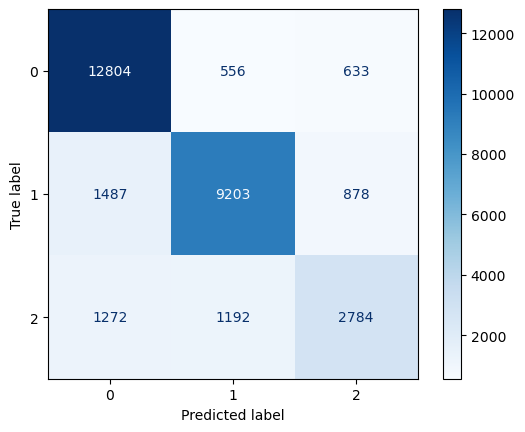

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb_model.classes_)
disp.plot(cmap='Blues')

##### Preparing data for Gaussian Naive Bayes

* For the Gaussian Naive Bayes model, we prepare the data by standardizing numerical columns and applying one-hot encoding to categorical data before feeding it into the model.

In [24]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [26]:
df3 = df.copy()

In [27]:
from sklearn.preprocessing import StandardScaler

# Get all numeric columns from the dataframe
numeric_cols = df3.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numeric columns
df3[numeric_cols] = scaler.fit_transform(df3[numeric_cols])

In [28]:
df3.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.220342,...,-0.533485,-1.067562,0.439717,No,-0.497038,-0.709737,High_spent_Small_value_payments,-0.380916,2.197401,Good
1,2022-02-01,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.123985,...,-0.533485,-0.066489,0.469814,No,-0.497038,-0.390631,Low_spent_Large_value_payments,-0.571768,0.845154,Good
2,2022-03-01,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.220342,...,-0.533485,-0.718376,0.459782,No,-0.497038,-0.698914,Low_spent_Medium_value_payments,-0.252728,-0.507093,Good
3,2022-04-01,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.085442,...,-0.533485,-0.177318,0.469814,No,-0.497038,0.293494,Low_spent_Small_value_payments,-0.990787,0.169031,Good
4,2022-05-01,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.017993,...,-0.533485,-1.463366,0.479846,No,-0.497038,-1.038368,High_spent_Medium_value_payments,-0.182323,-0.507093,Good


In [29]:
df3 = df3.drop(columns = ['Credit_Score', 'Month'])

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Type_of_Loan              100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [31]:
# List of categorical columns
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Apply one-hot encoding to categorical columns in df3
df3_encoded = pd.get_dummies(df3, columns=categorical_columns)

# Show the first few rows of the new df3 with one-hot encoded columns
df3_encoded.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,...,True,False,True,False,False,False,True,False,False,False
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,...,True,False,True,False,False,False,False,True,False,False
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,...,True,False,True,False,False,False,False,False,True,False
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,...,True,False,True,False,False,False,False,False,False,True
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,...,True,False,True,False,False,True,False,False,False,False


In [32]:
df3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 551 entries, Age to Payment_Behaviour_Low_spent_Small_value_payments
dtypes: bool(534), float64(17)
memory usage: 63.9 MB


In [33]:
# Check if these columns are in df3_encoded
columns_in_df3_encoded = [col for col in categorical_columns if col in df3_encoded.columns]

# Print the columns that are present
print(f"Columns present in df3_encoded: {columns_in_df3_encoded}")

Columns present in df3_encoded: []


* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [34]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(df3_encoded, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Performing Gaussian Naive Bayes

In [35]:
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred = gnb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.5223
              precision    recall  f1-score   support

           0       0.48      0.98      0.65     14634
           1       0.80      0.31      0.44     12597
           2       0.39      0.07      0.11      8748

    accuracy                           0.52     35979
   macro avg       0.56      0.45      0.40     35979
weighted avg       0.57      0.52      0.45     35979



In [36]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[14368   193    73]
 [ 7919  3847   831]
 [ 7403   769   576]]


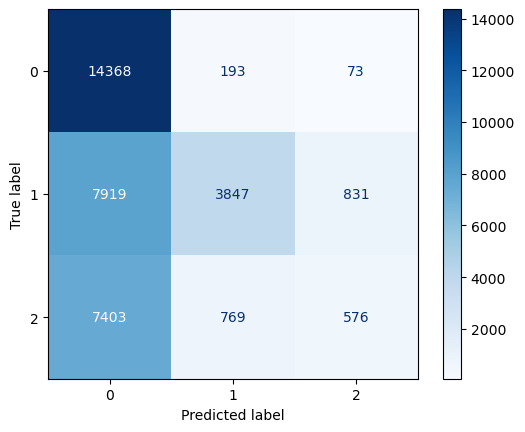

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb_model.classes_)
disp.plot(cmap='Blues')

* It is observed that the model achieves an accuracy of 52% when both numerical and categorical data are included, as Gaussian Naive Bayes is designed to work with only numerical data. Next, we will try feeding the model with only standardized numerical columns to evaluate its performance.

In [39]:
df4 = df3[numeric_cols]

In [40]:
df4.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,-0.533485,-1.067562,0.439717,-0.497038,-0.709737,-0.380916,2.197401
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,-0.533485,-0.066489,0.469814,-0.497038,-0.390631,-0.571768,0.845154
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,-0.533485,-0.718376,0.459782,-0.497038,-0.698914,-0.252728,-0.507093
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,-0.533485,-0.177318,0.469814,-0.497038,0.293494,-0.990787,0.169031
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,-0.533485,-1.463366,0.479846,-0.497038,-1.038368,-0.182323,-0.507093


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Outstanding_Debt          100000 non-null  float64
 11  Credit_Utilization_Ratio  100000 non-null  float64
 12  Credit_History_Age        100000 non-null  float64
 13  Total_EMI_per_month       100000 non-null  fl

* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [42]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(df4, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Perform Gaussian Naive Bayes

In [43]:
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred = gnb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.7751
              precision    recall  f1-score   support

           0       0.76      0.90      0.82     14183
           1       0.86      0.78      0.82     12060
           2       0.66      0.51      0.57      6858

    accuracy                           0.78     33101
   macro avg       0.76      0.73      0.74     33101
weighted avg       0.77      0.78      0.77     33101



In [44]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12769   338  1076]
 [ 1910  9411   739]
 [ 2184  1199  3475]]


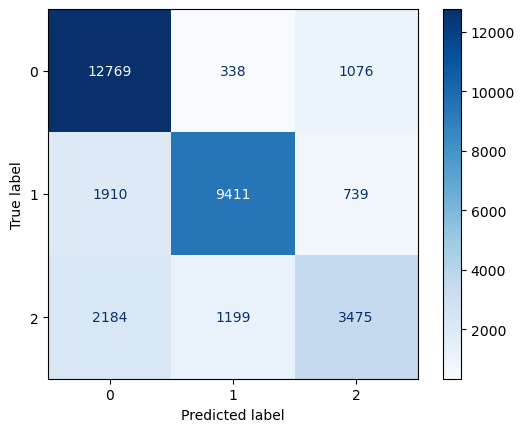

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb_model.classes_)
disp.plot(cmap='Blues')

* The model demonstrated significantly improved performance, achieving an accuracy of 77.5%. This highlights how the format of the data fed into the model impacts its ability to learn patterns effectively.

##### Preparing data for Bernoulli Naive Bayes

* All columns must be in a Boolean format (0 or 1). Therefore, I will discretize the numeric columns, apply one-hot encoding to all the categorical columns, and then feed the processed data into the Bernoulli Naive Bayes model.

In [46]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [48]:
df4 = df.copy()

In [49]:
# Annual Income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, float('inf')]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']
df4['Income_Binned'] = pd.cut(df4['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Delay from Due Date
delay_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 75]
delay_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-39', '40-49', '50-59', '60+']
df4['Delay_Binned'] = pd.cut(df4['Delay_from_due_date'], bins=delay_bins, labels=delay_labels, right=False)

# Number of Delayed Payments
delayed_payment_bins = [0, 2, 5, 8, 10, 12, 15, 20, 30]
delayed_payment_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15-19', '20+']
df4['Num_Delayed_Payment_Binned'] = pd.cut(df4['Num_of_Delayed_Payment'], bins=delayed_payment_bins, labels=delayed_payment_labels, right=False)

# Changed Credit Limit
credit_limit_bins = [-float('inf'), -10, 0, 5, 10, 15, 20, 25, float('inf')]
credit_limit_labels = ['< -10', '-10 to 0', '0-4', '5-9', '10-14', '15-19', '20-24', '25+']
df4['Changed_Credit_Limit_Binned'] = pd.cut(df4['Changed_Credit_Limit'], bins=credit_limit_bins, labels=credit_limit_labels, right=False)

# Number of Credit Inquiries
inquiries_bins = [0, 2, 5, 8, 10, 12, 15, float('inf')]
inquiries_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15+']
df4['Num_Credit_Inquiries_Binned'] = pd.cut(df4['Num_Credit_Inquiries'], bins=inquiries_bins, labels=inquiries_labels, right=False)

# Outstanding Debt
debt_bins = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
debt_labels = ['0-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000+']
df4['Outstanding_Debt_Binned'] = pd.cut(df4['Outstanding_Debt'], bins=debt_bins, labels=debt_labels, right=False)

# Credit Utilization Ratio
util_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, float('inf')]
util_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45+']
df4['Credit_Utilization_Ratio_Binned'] = pd.cut(df4['Credit_Utilization_Ratio'], bins=util_bins, labels=util_labels, right=False)

# Credit History Age
history_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
history_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400+']
df4['Credit_History_Age_Binned'] = pd.cut(df4['Credit_History_Age'], bins=history_bins, labels=history_labels, right=False)

# Total EMI per Month
emi_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, float('inf')]
emi_labels = ['0-24', '25-49', '50-74', '75-99', '100-124', '125-149', '150-174', '175-199', '200-224', '225-249', '250+']
df4['Total_EMI_per_month_Binned'] = pd.cut(df4['Total_EMI_per_month'], bins=emi_bins, labels=emi_labels, right=False)

# Amount Invested Monthly
invest_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
invest_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499', '500+']
df4['Amount_invested_monthly_Binned'] = pd.cut(df4['Amount_invested_monthly'], bins=invest_bins, labels=invest_labels, right=False)

# Monthly Balance
balance_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, float('inf')]
balance_labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900+']
df4['Monthly_Balance_Binned'] = pd.cut(df4['Monthly_Balance'], bins=balance_bins, labels=balance_labels, right=False)

# Age Binned
age_bins = [0, 12, 18, 24, 30, 35, 40, 45, 50, 60, float('inf')]
age_labels = ['0-11', '12-17', '18-23', '24-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60+']
df4['Age_Binned'] = pd.cut(df4['Age'], bins=age_bins, labels=age_labels, right=False)

# Number of Bank Accounts
bank_accounts_bins = [0, 3, 6, 9, float('inf')]
bank_accounts_labels = ['0-2', '3-5', '6-8', '9+']
df4['Num_Bank_Accounts_Binned'] = pd.cut(df4['Num_Bank_Accounts'], bins=bank_accounts_bins, labels=bank_accounts_labels, right=False)

# Number of Credit Cards
credit_cards_bins = [0, 3, 6, 9, float('inf')]
credit_cards_labels = ['0-2', '3-5', '6-8', '9+']
df4['Num_Credit_Card_Binned'] = pd.cut(df4['Num_Credit_Card'], bins=credit_cards_bins, labels=credit_cards_labels, right=False)

# Interest Rate
interest_rate_bins = [0, 10, 20, 30, float('inf')]
interest_rate_labels = ['0-9', '10-19', '20-29', '30+']
df4['Interest_Rate_Binned'] = pd.cut(df4['Interest_Rate'], bins=interest_rate_bins, labels=interest_rate_labels, right=False)

# Number of Loans
loan_bins = [0, 3, 6, 9, float('inf')]
loan_labels = ['0-2', '3-5', '6-8', '9+']
df4['Num_of_Loan_Binned'] = pd.cut(df4['Num_of_Loan'], bins=loan_bins, labels=loan_labels, right=False)

# Unemployment Rate
unemployment_bins = [3.5, 3.6, 3.7, 3.8, float('inf')]
unemployment_labels = ['3.5', '3.6', '3.7', '3.8+']
df4['Unemployment_Rate_Binned'] = pd.cut(df4['Unemployment_Rate'], bins=unemployment_bins, labels=unemployment_labels, right=False)


In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Month                            100000 non-null  object  
 1   Age                              100000 non-null  int64   
 2   Occupation                       100000 non-null  object  
 3   Annual_Income                    100000 non-null  float64 
 4   Num_Bank_Accounts                100000 non-null  float64 
 5   Num_Credit_Card                  100000 non-null  float64 
 6   Interest_Rate                    100000 non-null  int64   
 7   Num_of_Loan                      100000 non-null  int64   
 8   Type_of_Loan                     100000 non-null  object  
 9   Delay_from_due_date              100000 non-null  float64 
 10  Num_of_Delayed_Payment           100000 non-null  float64 
 11  Changed_Credit_Limit             100000 non-null  flo

In [51]:
# List of columns that have been binned
binned_columns = [
    'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Num_Bank_Accounts', 
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Unemployment_Rate'
]

# Drop the original numeric columns that have been discretized
df4.drop(columns=binned_columns, inplace=True)

In [52]:
df4 = df4.drop(columns = ['Month','Credit_Score'])

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Occupation                       100000 non-null  object  
 1   Type_of_Loan                     100000 non-null  object  
 2   Credit_Mix                       100000 non-null  object  
 3   Payment_of_Min_Amount            100000 non-null  object  
 4   Payment_Behaviour                100000 non-null  object  
 5   Income_Binned                    100000 non-null  category
 6   Delay_Binned                     100000 non-null  category
 7   Num_Delayed_Payment_Binned       100000 non-null  category
 8   Changed_Credit_Limit_Binned      100000 non-null  category
 9   Num_Credit_Inquiries_Binned      100000 non-null  category
 10  Outstanding_Debt_Binned          100000 non-null  category
 11  Credit_Utilization_Ratio_Binned  100000 non-null  cat

In [54]:
# Apply one-hot encoding to specific columns
df4_encoded = pd.get_dummies(df4, columns=df4.columns, drop_first=True)
df4_encoded.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Num_Credit_Card_Binned_9+,Interest_Rate_Binned_10-19,Interest_Rate_Binned_20-29,Interest_Rate_Binned_30+,Num_of_Loan_Binned_3-5,Num_of_Loan_Binned_6-8,Num_of_Loan_Binned_9+,Unemployment_Rate_Binned_3.6,Unemployment_Rate_Binned_3.7,Unemployment_Rate_Binned_3.8+
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [55]:
df4_encoded = df4_encoded.astype(int)

* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [56]:
# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(df4_encoded, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Perform Bernoulli Naive Bayes

In [57]:
# Initialize the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()

# Train the model
bnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.7913
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     14702
           1       0.84      0.75      0.79     13139
           2       0.71      0.71      0.71      9216

    accuracy                           0.79     37057
   macro avg       0.78      0.78      0.78     37057
weighted avg       0.79      0.79      0.79     37057



In [58]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12915   377  1410]
 [ 2060  9852  1227]
 [ 1100  1559  6557]]


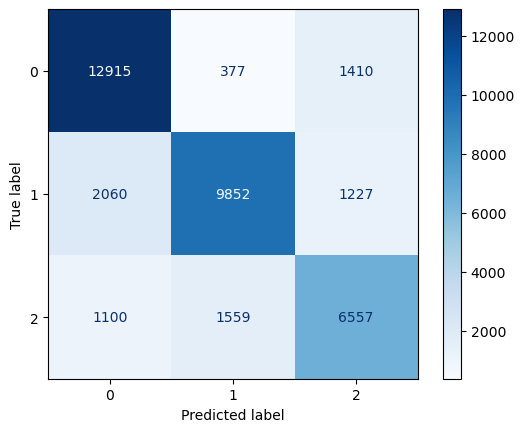

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb_model.classes_)
disp.plot(cmap='Blues')

# Conclusion and Results

The analysis of the performance of various **Naive Bayes models** on the dataset has provided insights into how different variations of the algorithm perform with different data preprocessing techniques and feature formats.

---

## Key Features:
For the Naive Bayes models, the impact of data preprocessing was found to be crucial. The accuracy and classification performance varied significantly based on the alignment of the input data with the model's assumptions.  

---

## Naive Bayes Model Results:

### **Multinomial Naive Bayes (With All Features):**
- **Accuracy:** 80.47%
- **Classification Report:**
  - **Precision:** 0.82 for class 0, 0.84 for class 1, and 0.65 for class 2.
  - **Recall:** 0.92 for class 0, 0.80 for class 1, and 0.53 for class 2.
  - **F1-Score:** 0.87 for class 0, 0.82 for class 1, and 0.58 for class 2.


- **Key Insights:** 
- Multinomial Naive Bayes achieved good overall performance, especially for classes 0 and 1. 
- However, class 2 had lower precision and recall, indicating difficulty in distinguishing this class.

---

### **Gaussian Naive Bayes (With All Features):**
- **Accuracy:** 52.23%
- **Classification Report:**
- **Precision:** 0.48 for class 0, 0.80 for class 1, and 0.39 for class 2.
- **Recall:** 0.98 for class 0, 0.31 for class 1, and 0.07 for class 2.
- **F1-Score:** 0.65 for class 0, 0.44 for class 1, and 0.11 for class 2.


- **Key Insights:** 
- The model struggles with mixed data types, over-predicting class 0 and failing to generalize for classes 1 and 2.
- This aligns with Gaussian Naive Bayes being designed to handle numerical data only.

---

### **Gaussian Naive Bayes (With Only Numerical Features):**
- **Accuracy:** 77.51%
- **Classification Report:**
- **Precision:** 0.76 for class 0, 0.86 for class 1, and 0.66 for class 2.
- **Recall:** 0.90 for class 0, 0.78 for class 1, and 0.51 for class 2.
- **F1-Score:** 0.82 for class 0, 0.82 for class 1, and 0.57 for class 2.


- **Key Insights:** 
- By restricting the input to only standardized numerical columns, the model's performance improved significantly. 
- The higher accuracy and balanced metrics across all classes demonstrate that Gaussian Naive Bayes works best with its intended input format.

---

### **Bernoulli Naive Bayes (With Binary Features):**
- **Accuracy:** 79.13%
- **Classification Report:**
- **Precision:** 0.80 for class 0, 0.84 for class 1, and 0.71 for class 2.
- **Recall:** 0.88 for class 0, 0.75 for class 1, and 0.71 for class 2.
- **F1-Score:** 0.84 for class 0, 0.79 for class 1, and 0.71 for class 2.


- **Key Insights:** 
- Bernoulli Naive Bayes performed competitively, with accuracy comparable to Multinomial Naive Bayes.
- The binary format aligns well with the algorithm's assumptions, resulting in consistent performance across all classes.

---

## Conclusion:

1. **Model Performance:** 
 - The **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** achieved the best performance on the dataset, with accuracies of 80.47% and 79.13%, respectively.
 - **Gaussian Naive Bayes** showed better performance when restricted to numerical features (77.51%) but struggled with mixed feature types.

2. **Feature Format Impact:** 
 - The **format of data** is critical for Naive Bayes models. Each variation has specific assumptions about the input data, and adhering to these assumptions significantly improves performance.
 - For example, Gaussian Naive Bayes excelled with numerical features, while Bernoulli Naive Bayes required binary data.

3. **Class-Level Observations:**
 - All models faced challenges with class 2, with lower precision and recall compared to other classes. This indicates an imbalance or difficulty in learning patterns for this class.

4. **Recommendation:**
 - For datasets with mixed feature types, preprocessing techniques like one-hot encoding (for Multinomial Naive Bayes) or binarization (for Bernoulli Naive Bayes) should be applied to align with model assumptions.
 - While Naive Bayes models are simple and interpretable, further improvements in class 2's performance might require exploring advanced algorithms or ensemble methods.
